### 4.10 Task: Part 1

# CONTENTS
    1 Importing libraries 
    2 Importing data 
    3 Addressing Personally Identifiable Information (PII) within the Data 
    4 Comparing Customer Behaviour in different geographic areas 
    5 Creating an exclusion flag for low-activity customers and exporting sample
    6 Customer Type Classification Based on Demographics and Shopping Behaviour
    7 Aggregating variables of customer-profile for usage frequency and expenditure
    8 Compare customer profiles with regions and departments
    9 Exporting Data

##### 1 Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

##### 2 Importing Data

In [2]:
# establishing a path

path = r'/Users/vickyczada/Library/CloudStorage/OneDrive-Personal/Documents/Career Foundry/Data Immersion/05-2025 Instacart Basket Analysis'

In [3]:
# importing dataframe

df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [4]:
# check the dataframe 

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,busiest_day,First Name,last_name,Gender,state,Age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Regularly busy,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Regularly busy,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Regularly busy,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Regularly busy,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Regularly busy,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


##### 3 Addressing Personally Identifiable Information (PII) in the Dataframe

In [5]:
# creating a separate dataframe with columns with PII dropped for data protection

df_merged_2 = df_merged.drop(columns = ['First Name', 'last_name'])

In [6]:
# Check the dataframe

df_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_between_orders,order_frequency_flag,busiest_day,Gender,state,Age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
# allow to see all columns 

pd.options.display.max_columns = None

In [8]:
df_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,busiest_day,Gender,state,Age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423


##### 4 Comparing Customer Behaviour in different geographic areas

In [9]:
# Region mapping using U.S. Census Bureau classification

def get_region(state):
    northeast = [
        'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
        'New Jersey', 'New York', 'Pennsylvania'
    ]
    midwest = [
        'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
        'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'
    ]
    south = [
        'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
        'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
        'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'
    ]
    west = [
        'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
        'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'
    ]

    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

In [10]:
# Apply to the DataFrame

df_merged_2['region'] = df_merged_2['state'].apply(get_region)

In [11]:
df_merged_2['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [12]:
# check the dataframe

df_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,busiest_day,Gender,state,Age,date_joined,number_of_dependents,family_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South


In [13]:
# Basic cross-tabulation

spending_by_region = pd.crosstab(df_merged_2['region'], df_merged_2['spending_flag'])

In [14]:
# check the spending flag

print (spending_by_region)

spending_flag  High spender  Low spender
region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


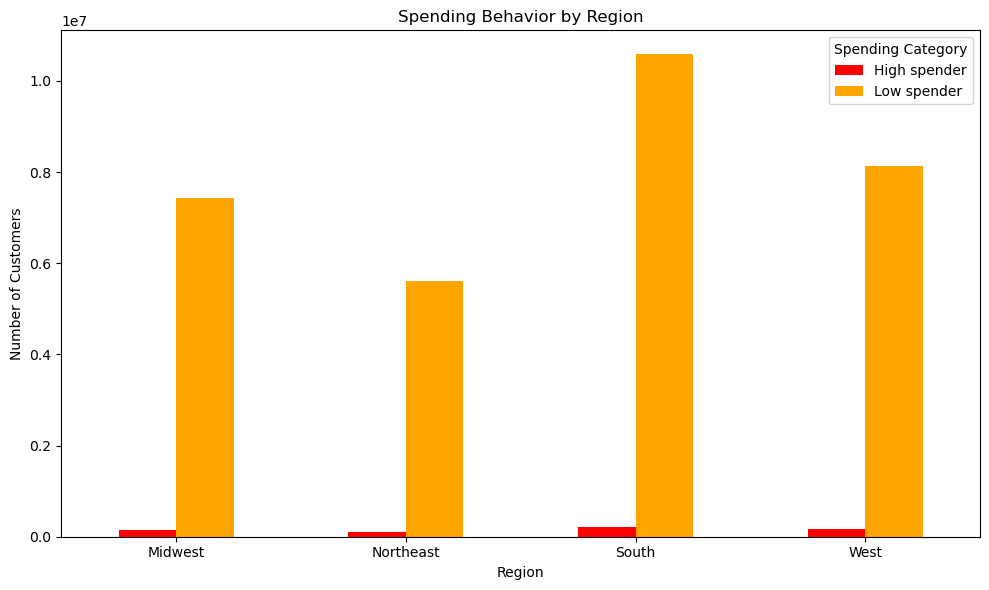

In [15]:
# Plot the column chart

spending_by_region = spending_by_region.plot(kind='bar', figsize=(10, 6), color=['red', 'orange'])

# Chart details

plt.title('Spending Behavior by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Spending Category')
plt.tight_layout()

In [16]:
# Export bar chart

spending_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'spending_by_region.png'))

This chart highlights that in every region, the majority of customers are low spenders. However, the South stands out with the highest number of both high and low spenders overall. In contrast, the Northeast has the smallest number of both high and low spenders when compared to other regions.

In [17]:
# exporting visualisation 

spending_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'spending_by_region_2.png'))

##### 5 Creating an exclusion flag for low-activity customers

In [18]:
#Creating an exclusion flag
# Low-activity customers = max_order < 5
# High-activity customer = max_order >=5

activity_customer = []

for value in df_merged_2['max_order']:
    if value < 5:
        activity_customer.append('Low-activity Customer')
    else:
        activity_customer.append('High-activity Customer')

df_merged_2['activity_customer_level'] = activity_customer

In [19]:
# checking the function 

df_merged_2['activity_customer_level'].value_counts(dropna = False)

activity_customer_level
High-activity Customer    30964564
Low-activity Customer      1440295
Name: count, dtype: int64

In [20]:
# Subsetting a new dataframe based on high-activity customers

high_activity_cust = df_merged_2[df_merged_2['activity_customer_level']=='High-activity Customer']

In [21]:
# check the subset

high_activity_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,busiest_day,Gender,state,Age,date_joined,number_of_dependents,family_status,income,region,activity_customer_level
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer


In [22]:
# further check

high_activity_cust['activity_customer_level'].value_counts(dropna = False)

activity_customer_level
High-activity Customer    30964564
Name: count, dtype: int64

In [23]:
# exporting subset of high activity customers to pickle

high_activity_cust.to_pickle(os.path.join(path, 'high_activity_customers_2.pickle'))

##### 6 Creating a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

In [24]:
# import department data dictionary 

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [25]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [26]:
# Rename the unnamed column to deptment_id
df_dep.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [27]:
# checking for nulls 

print(df_merged_2[['Age', 'number_of_dependents']].isnull().sum())

Age                     0
number_of_dependents    0
dtype: int64


In [28]:
# checking data types

print(df_merged_2[['Age', 'number_of_dependents']].dtypes)

Age                     int64
number_of_dependents    int64
dtype: object


In [29]:
# create a customer profile flag for age and number of dependents 

# initialise all in the flag with 'other'
df_merged_2['customer_profile'] = 'Other'

In [30]:
# Assign 'Young Adult' to customers under 35 with no dependents

df_merged_2.loc[
    (df_merged_2['Age'] <= 35) & 
    (df_merged_2['number_of_dependents'] == 0), 
    'customer_profile'
] = 'Young Adult'

In [31]:
# Assign 'Young Parent' to customers under or equal to 45 with dependents

df_merged_2.loc[
    (df_merged_2['Age'] <= 45) & 
    (df_merged_2['number_of_dependents'] > 0), 
    'customer_profile'
] = 'Young Parent'

In [32]:
# Assign 'Mature with Dependent(s)' to customers aged 45 and above with dependents

df_merged_2.loc[
    (df_merged_2['Age'] >= 45) & (df_merged_2['Age'] <= 65) &
    (df_merged_2['number_of_dependents'] >= 1), 
    'customer_profile'
] = 'Mature with Dependent(s)'


In [33]:
# Assign 'Senior Customer' to customers aged 60 and above with any number of dependents

df_merged_2.loc[
    df_merged_2['Age'] >= 65,
    'customer_profile'
] = 'Senior Customer'

In [34]:
df_merged_2['customer_profile'].value_counts(dropna = False)

customer_profile
Young Parent                10275633
Senior Customer              8575084
Mature with Dependent(s)     7576723
Other                        3701197
Young Adult                  2276222
Name: count, dtype: int64

In [35]:
df_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,busiest_day,Gender,state,Age,date_joined,number_of_dependents,family_status,income,region,activity_customer_level,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent


Text(0.5, 1.0, 'Customer Distribution by Age Group and Dependents')

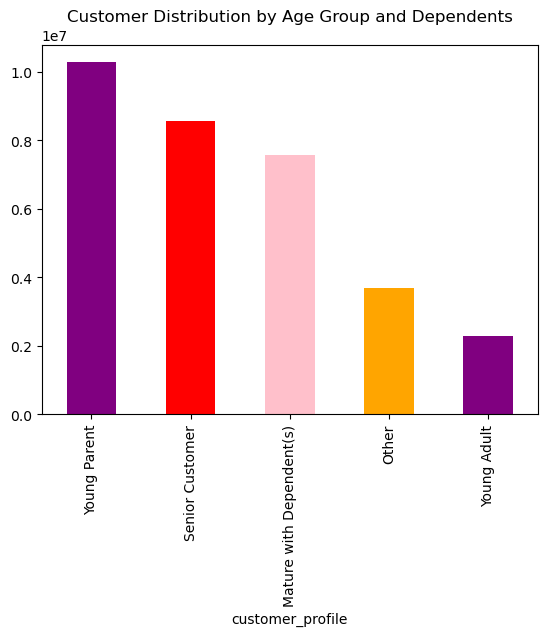

In [36]:
bar_age_dependents = df_merged_2['customer_profile'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange'])

plt.title('Customer Distribution by Age Group and Dependents')

In [37]:
# Export bar chart

bar_age_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_age_dependents.png'))

In [38]:
max_income_bracket = df_merged_2['income'].max()
min_income_bracket = df_merged_2['income'].min()

print("Maximum income:", max_income_bracket)
print("Minimum income:", min_income_bracket)

Maximum income: 593901
Minimum income: 25903


In [39]:
#Customer profiling based on income 

df_merged_2['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [40]:
# create an income_bracket to help with customer profiles

income_bracket=[]

for value in df_merged_2['income']:
    if value <96608:
        income_bracket.append('Low Income Customer')
    elif value >=96608 and value <127876:
        income_bracket.append('Middle Income Customer')
    elif  value >=127876:
        income_bracket.append('High Income Customer')
    else: income_bracket.append('Not enough information')
df_merged_2['Income_bracket']=income_bracket

In [41]:
# confirming function

df_merged_2['Income_bracket'].value_counts(dropna= False)

Income_bracket
Low Income Customer       16198904
High Income Customer       8105026
Middle Income Customer     8100929
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Distribution by Income')

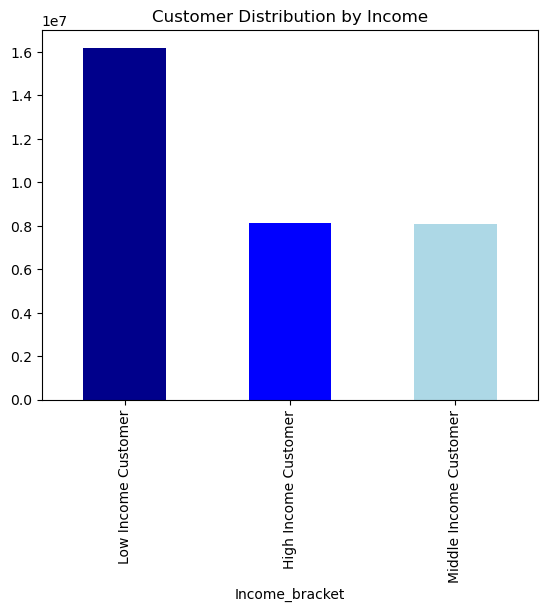

In [42]:
bar_income = df_merged_2['Income_bracket'].value_counts().plot.bar(color =['darkblue', 'blue', 'lightblue'])

plt.title('Customer Distribution by Income')

In [43]:
# Export bar chart

bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'BarChart_income.png'))

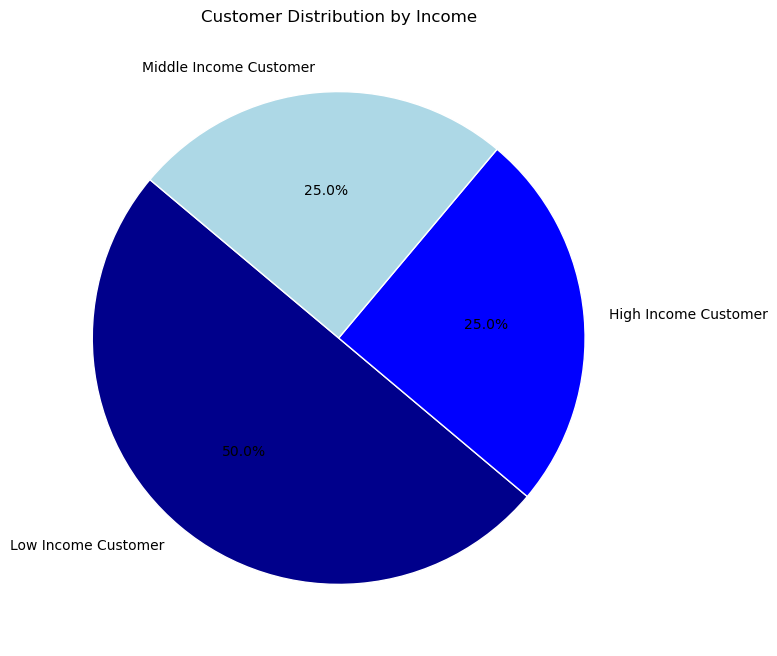

In [44]:
# Alternative
#Create a pie chart for the distribution of Income_bracket

income_distribution = df_merged_2['Income_bracket'].value_counts()
colors = ['darkblue', 'blue', 'lightblue']

plt.figure(figsize=(8, 8))  
income_distribution.plot.pie(
    colors=colors,
    autopct='%1.1f%%',  
    startangle=140,     
    wedgeprops=dict(edgecolor='w')  
)

plt.title('Customer Distribution by Income')
plt.ylabel('')  
plt.show()

In [45]:
# Export Pie Chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'PieChart_IncomeDistribution.png'), format='png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [46]:
income_profile = pd.crosstab(df_merged_2['Income_bracket'], df_merged_2['customer_profile'])
print(income_profile)

customer_profile        Mature with Dependent(s)    Other  Senior Customer  \
Income_bracket                                                               
High Income Customer                     2898067  1201356          3289655   
Low Income Customer                      1994553  1381099          2267950   
Middle Income Customer                   2684103  1118742          3017479   

customer_profile        Young Adult  Young Parent  
Income_bracket                                     
High Income Customer          24735        691213  
Low Income Customer         2093227       8462075  
Middle Income Customer       158260       1122345  


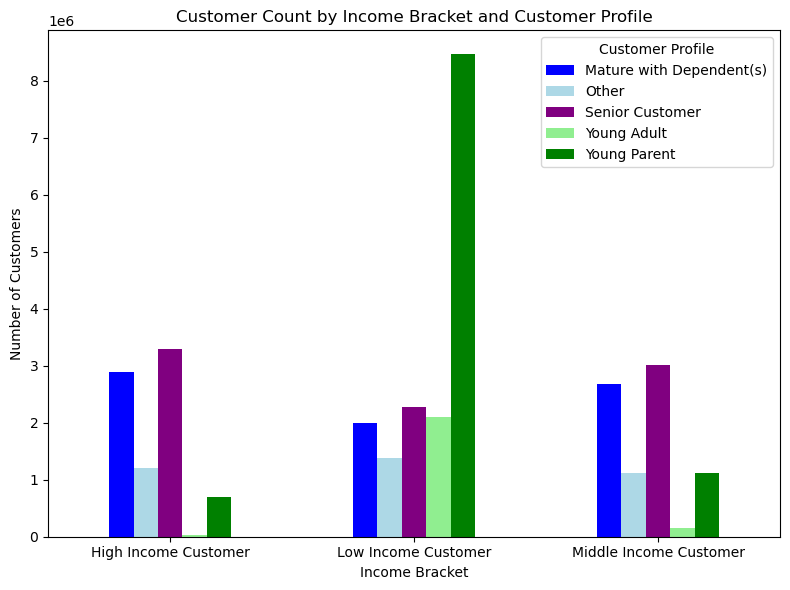

In [47]:
# Plotting grouped bar chart

bar_income_profile = income_profile.plot(kind='bar', figsize=(8, 6), color=['blue', 'lightblue', 'purple', 'lightgreen', 'green'])

# Chart formatting
plt.title('Customer Count by Income Bracket and Customer Profile')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Customer Profile')
plt.tight_layout()
plt.show()

In [48]:
# Export bar chart

bar_income_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_income_profile.png'))

In [49]:
# Initialise the column for shopper type i.e. time of day or day they tend to shop

df_merged_2['shopper_type'] = None

In [93]:
# Assign Weekend/Night

df_merged_2.loc[
    (df_merged_2['orders_day_of_week'] <=1) & 
    (df_merged_2['order_hour_of_day'].isin([20, 21, 22, 23, 0, 1, 2, 3, 4])),
    'shopper_type'
] = 'Weekend Night'

In [51]:
# Assign Weekend/Day

df_merged_2.loc[
    (df_merged_2['orders_day_of_week'] <= 1) & 
    (~df_merged_2['order_hour_of_day'].isin([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])),
    'shopper_type'
] = 'Weekend Day'

In [97]:
# Assign Weekday/Night

df_merged_2.loc[
    (df_merged_2['orders_day_of_week'] > 1) & 
    (df_merged_2['order_hour_of_day'].isin([20, 21, 22, 23, 0, 1, 2, 3, 4])),
    'shopper_type'
] = 'Weekday Night'

In [53]:
# Assign Weekday/Day

df_merged_2.loc[
    (df_merged_2['orders_day_of_week'] > 1) & 
    (~df_merged_2['order_hour_of_day'].isin([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])),
    'shopper_type'
] = 'Weekday Day'

In [98]:
df_merged_2['shopper_type'].value_counts(dropna= False)

shopper_type
None             28709704
Weekday Night     2195278
Weekend Night     1121423
Weekday Day        264754
Weekend Day        113700
Name: count, dtype: int64

In [99]:
shopper_profile = pd.crosstab(df_merged_2['shopper_type'], df_merged_2['customer_profile'])
print(income_profile)

customer_profile        Mature with Dependent(s)    Other  Senior Customer  \
Income_bracket                                                               
High Income Customer                     2898067  1201356          3289655   
Low Income Customer                      1994553  1381099          2267950   
Middle Income Customer                   2684103  1118742          3017479   

customer_profile        Young Adult  Young Parent  
Income_bracket                                     
High Income Customer          24735        691213  
Low Income Customer         2093227       8462075  
Middle Income Customer       158260       1122345  


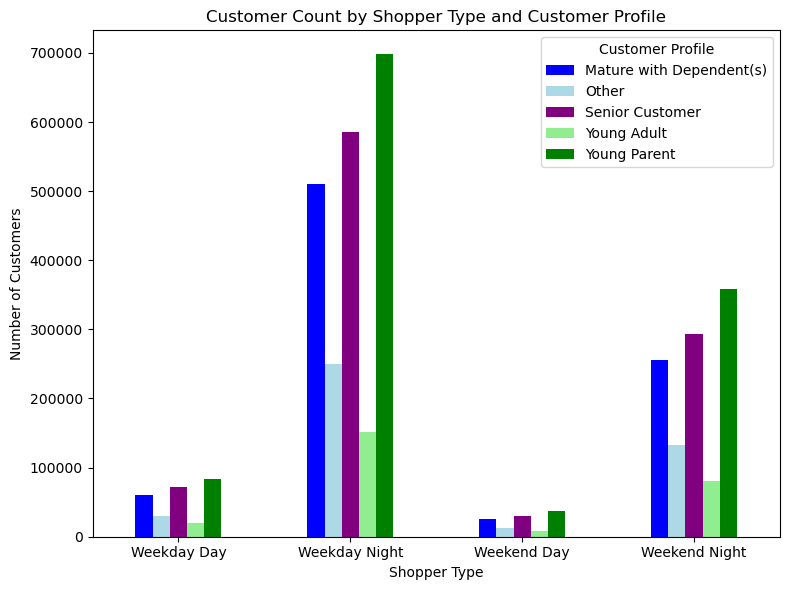

In [100]:
# Plotting grouped bar chart

bar_shopper_profile = shopper_profile.plot(kind='bar', figsize=(8, 6), color=['blue', 'lightblue', 'purple', 'lightgreen', 'green'])

# Chart formatting
plt.title('Customer Count by Shopper Type and Customer Profile')
plt.xlabel('Shopper Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Customer Profile')
plt.tight_layout()
plt.show()

In [57]:
# Export bar chart

bar_shopper_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_shopper_profile.png'))

In [58]:
df_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,busiest_day,Gender,state,Age,date_joined,number_of_dependents,family_status,income,region,activity_customer_level,customer_profile,Income_bracket,shopper_type
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent,Low Income Customer,None
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent,Low Income Customer,None
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent,Low Income Customer,None
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent,Low Income Customer,None
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent,Low Income Customer,None


##### 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [59]:
df_merged_2.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_product_price,median_days_between_orders,Age,number_of_dependents,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,1.198023e+01,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.956554e+02,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [60]:
# Aggregation function on variables for customer profiles for expenditure

df_merged_2.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

order_number                prices               
                 max min       mean    max  min      mean
user_id                                                  
1                 10   1   5.813559   14.0  1.0  6.367797
2                 14   1   8.035897   14.8  1.3  7.515897
3                 12   1   6.000000   14.4  1.3  8.197727
4                  5   1   2.888889   14.6  1.4  8.205556
5                  4   1   2.486486   14.8  3.2  9.189189
...              ...  ..        ...    ...  ...       ...
206205             3   1   1.687500   23.8  1.4  8.909375
206206            67   1  38.007018   14.8  1.1  7.646667
206207            16   1   8.116592   24.7  1.2  7.313453
206208            49   1  25.505170   21.6  1.1  8.366617
206209            13   1   6.937984   18.8  1.1  7.058915

[206209 rows x 6 columns]

In [61]:
# Aggregation function on variables for customer profiles for Frequency

df_merged_2.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.813559                   30.0   0.0  20.259259
2                 14   1   8.035897                   30.0   3.0  15.967033
3                 12   1   6.000000                   21.0   7.0  11.487179
4                  5   1   2.888889                   21.0   0.0  15.357143
5                  4   1   2.486486                   19.0  10.0  14.500000
...              ...  ..        ...                    ...   ...        ...
206205             3   1   1.687500                   30.0  10.0  20.666667
206206            67   1  38.007018                   15.0   0.0   4.042705
206207            16   1   8.116592                   30.0   1.0  14.879397
206208            49   1  25.505170                   20.0   0.0   7.442105
206209            13   1   6.937984                   30.0   3.0  20.275862

[206209 rows x 6 columns]

##### 8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [62]:
# Using crosstab functiion on Region and Department

cross_region_department = pd.crosstab(df_merged_2['region'], df_merged_2['department_id'], dropna = False)

In [63]:
cross_region_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
region,,,,,,,,,,,,,,,,,,,,,
Midwest,524096,8420,273869,2227937,36186,63736,625574,22355,203769,8193,105749,166129,442101,163551,250702,1264223,175824,98983,673715,245678,16535
Northeast,390918,6585,208599,1665839,26542,46891,483418,18601,151816,5802,78815,124620,329445,123574,186755,954026,131485,75139,514675,186817,12374
South,747900,12212,388815,3160551,51624,89142,898940,31269,287444,11533,150350,235752,622436,234251,356015,1796969,243070,143654,957346,349419,23193
West,571829,9074,301145,2424964,39344,69484,680191,25491,223598,9045,112658,182426,481387,181657,274586,1383529,188287,106026,741814,269335,17043


In [64]:
#Adding new column with names of the department_id, I have tried merging the dataframes however this just crashed my system 

department_name = []

for value in df_merged_2['department_id']:
    if value == 1:
        department_name.append('frozen')
    elif value == 2:
        department_name.append('other')
    elif value == 3:
        department_name.append('bakery')
    elif value == 4:
        department_name.append('produce')
    elif value == 5:
        department_name.append('alcohol')
    elif value == 6:
        department_name.append('international')
    elif value == 7:
        department_name.append('beverages')
    elif value == 8:
        department_name.append('pets')
    elif value == 9:
        department_name.append('dry goods pasta')
    elif value == 10: 
        department_name.append('bulk')
    elif value == 11:
        department_name.append('personal care')
    elif value == 12:
        department_name.append('meat seafood')
    elif value == 13:
        department_name.append('pantry')
    elif value == 14:
        department_name.append('breakfast')
    elif value == 15:
        department_name.append('canned goods')
    elif value == 16:
        department_name.append('dairy eggs')
    elif value == 17:
        department_name.append('household')
    elif value == 18:
        department_name.append('babies')
    elif value == 19:
        department_name.append('snacks')
    elif value == 20:
        department_name.append('deli')
    elif value == 21:
        department_name.append('missing')
    else:
        department_name.append('Not enough information')


df_merged_2['department_name'] = department_name

In [65]:
df_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,Busiest days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,busiest_day,Gender,state,Age,date_joined,number_of_dependents,family_status,income,region,activity_customer_level,customer_profile,Income_bracket,shopper_type,department_name
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent,Low Income Customer,None,beverages
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent,Low Income Customer,None,dairy eggs
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent,Low Income Customer,None,snacks
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent,Low Income Customer,None,snacks
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Regularly busy,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity Customer,Young Parent,Low Income Customer,None,household


In [66]:
# Using crosstab functiion on Region and Department

cross_region_department = pd.crosstab(df_merged_2['region'], df_merged_2['department_name'], dropna = False)

In [67]:
cross_region_department

department_name,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,36186,98983,273869,625574,163551,8193,250702,1264223,245678,203769,524096,175824,63736,166129,16535,8420,442101,105749,22355,2227937,673715
Northeast,26542,75139,208599,483418,123574,5802,186755,954026,186817,151816,390918,131485,46891,124620,12374,6585,329445,78815,18601,1665839,514675
South,51624,143654,388815,898940,234251,11533,356015,1796969,349419,287444,747900,243070,89142,235752,23193,12212,622436,150350,31269,3160551,957346
West,39344,106026,301145,680191,181657,9045,274586,1383529,269335,223598,571829,188287,69484,182426,17043,9074,481387,112658,25491,2424964,741814


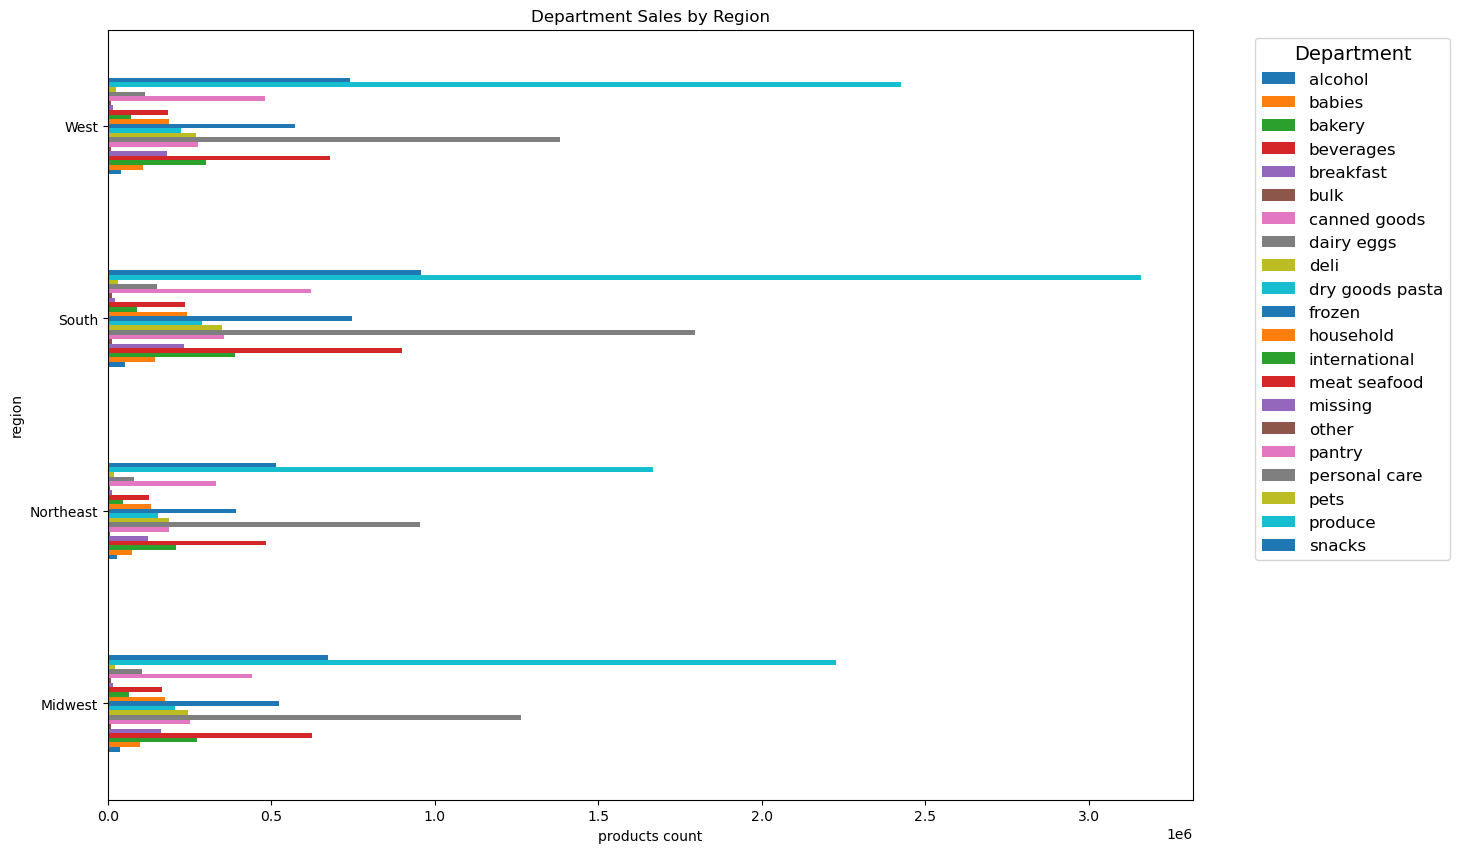

In [68]:
# Visualise a bar chart of Products ordered by Department across different regions

bar_region_department = cross_region_department.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')


# Move legend outside of plot

plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

Due to the amount of information I do not necessarily think this is the best way to represent this to the client, maybe doing it region by region would be better. However for the moment this highlights the differences between the regions for which products are purchased.

In [69]:
# Export bar chart

bar_region_department.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_region_department.png'))

In [70]:
# Visualise using the column I created earlier shopper type and region 

cross_region_shopper = pd.crosstab(df_merged_2['region'], df_merged_2['shopper_type'], dropna = False)

In [71]:
cross_region_shopper

shopper_type,Weekday Day,Weekend Day,NaN
region,,,
Midwest,579760,291397,6726168
Northeast,436926,220590,5065220
South,822354,410539,9558992
West,620992,312597,7359324


Text(0, 0.5, 'Region')

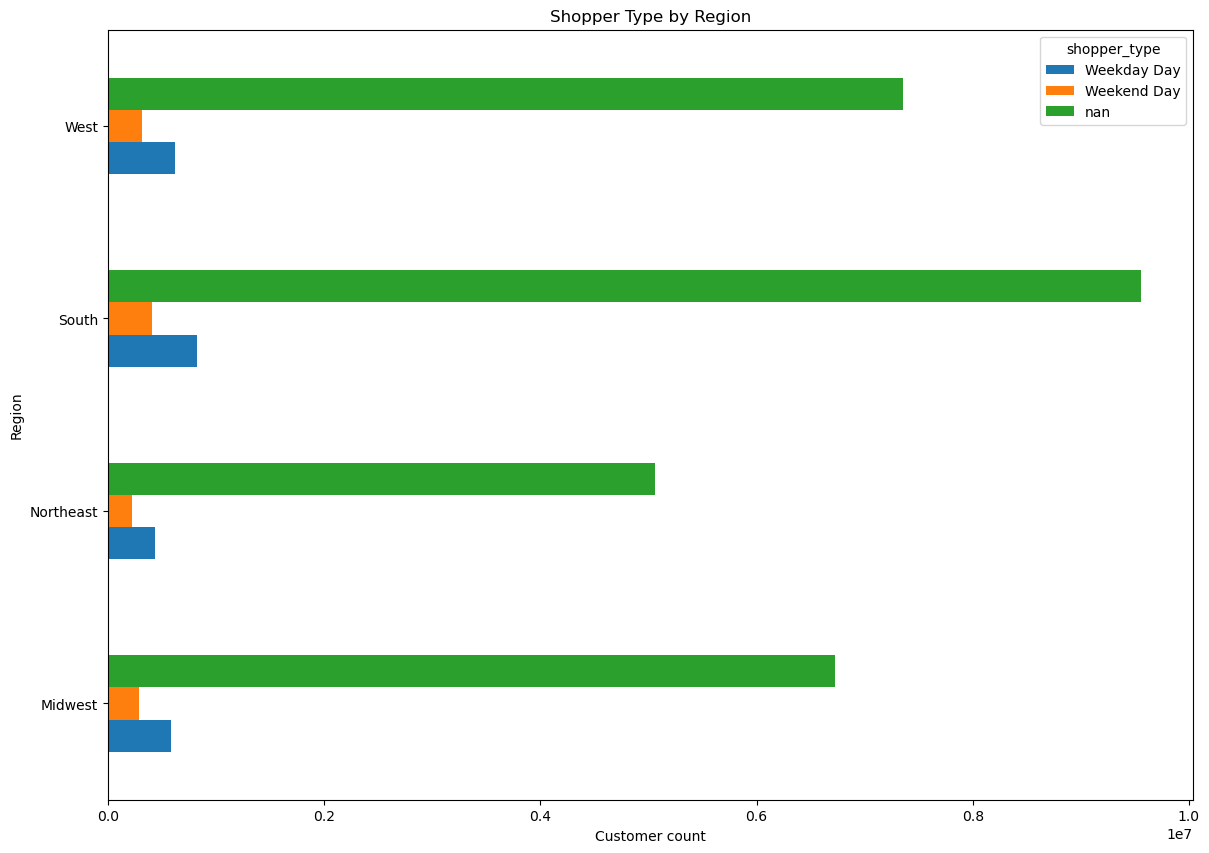

In [101]:
# Visualise a bar chart of shopper_type across different regions

bar_region_shopper = cross_region_shopper.plot(kind = 'barh', figsize=(14,10))
plt.title('Shopper Type by Region')
plt.xlabel('Customer count')
plt.ylabel('Region')

In [73]:
# Export bar chart

bar_region_shopper.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_region_shopper.png'))

In [74]:
# Drop NaN from the crosstab dataframe created in order for the bar chart to be clearer

try:
    cross_region_shopper = cross_region_shopper.drop(columns=['NaN'])
except KeyError:
    print("Column 'NaN' not found")

Column 'NaN' not found


In [75]:
cross_region_shopper

shopper_type,Weekday Day,Weekend Day,NaN
region,,,
Midwest,579760,291397,6726168
Northeast,436926,220590,5065220
South,822354,410539,9558992
West,620992,312597,7359324


In [76]:
# unfortunately this has not worked and although I have tried to find a way for it to work as it is a marker within the column I think this would need to be changed in the ordinal command.

From this we can see that for all regions weekday nights are most popular to shop, which is not necessiarly what was expected as I would have expected weekends to be higher up the list than they are.

In [77]:
# Using Crosstab function on loyalty with spending

cross_loyalty_spending = pd.crosstab(df_merged_2['loyalty_flag'], df_merged_2['spending_flag'], dropna = False)

In [78]:
cross_loyalty_spending

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,114831,6129159
Regular customer,302814,15573962


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

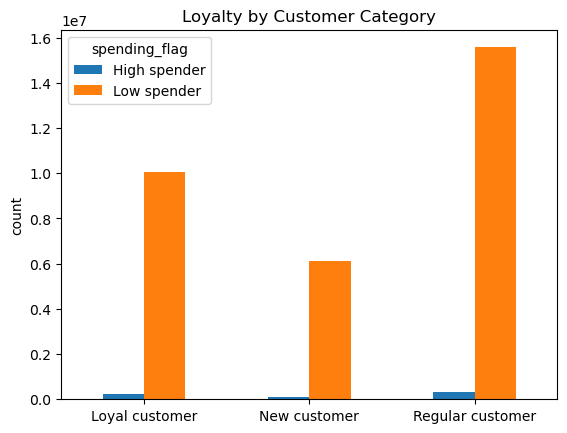

In [79]:
# Visualise a Bar Chart Loyalty across customers base

bar_loyalty_spending = cross_loyalty_spending.plot.bar()
plt.title('Loyalty by Customer Category')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [80]:
# Export the Bar chart
bar_loyalty_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_loyalty_spender.png'))

In [81]:
print(df_merged_2.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'Busiest days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'busiest_day', 'Gender', 'state', 'Age',
       'date_joined', 'number_of_dependents', 'family_status', 'income',
       'region', 'activity_customer_level', 'customer_profile',
       'Income_bracket', 'shopper_type', 'department_name'],
      dtype='object')


In [82]:
# using crosstab function for busiest_day and customer_profile

cross_busiest_profile = pd.crosstab(df_merged_2['busiest_day'], df_merged_2['customer_profile'], dropna = False)

In [83]:
cross_busiest_profile

customer_profile,Mature with Dependent(s),Other,Senior Customer,Young Adult,Young Parent
busiest_day,,,,,
Busiest day,1433328,712120,1643234,431680,1983820
Least busy,889079,429570,998222,269400,1197531
Regularly busy,5254316,2559507,5933628,1575142,7094282


(array([0, 1, 2]),
 [Text(0, 0, 'Busiest day'),
  Text(1, 0, 'Least busy'),
  Text(2, 0, 'Regularly busy')])

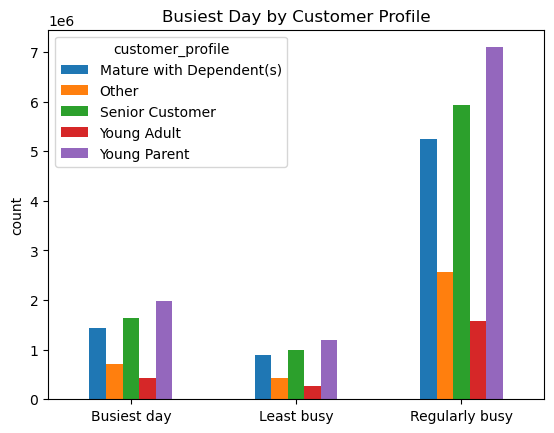

In [84]:
# Visualise a Bar Chart Loyalty across customers base

bar_busiest_profile = cross_busiest_profile.plot.bar()
plt.title('Busiest Day by Customer Profile')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

We can see here that Young Parents are our most active customers throughout. Therefore, we should consider targeted ads for young parents are they are a high percentage of our customers. Whereas Young Adult has the lowest across the graph. By adverising products young parents would find interesting we can grow the customer levels, however this does not mean the company should dismiss the other customer profiles and they should consider advertisments to help get them in the door.

In [85]:
# Export the Bar chart

bar_busiest_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_busiest_profile.png'))

In [86]:
# Using Crosstab function on loyalty with Family Status

cross_loyalty_family_status = pd.crosstab(df_merged_2['loyalty_flag'], df_merged_2['family_status'], dropna = False)

In [87]:
cross_loyalty_family_status

family_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882722,492749,7202500,1706122
New customer,530322,291210,4393693,1028765
Regular customer,1358768,766644,11160560,2590804


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

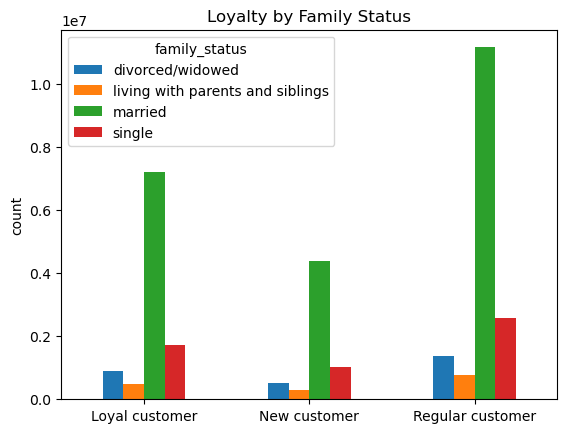

In [88]:
# Visualise a Bar Chart Loyalty across different family status of customers

bar_loyalty_family_status = cross_loyalty_family_status.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [89]:
# Export the Bar Chart

bar_loyalty_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_loyalty_family_status.png'))

This again highlights the trend from before that single/young with no dependents are not as regularly as those married or young parents.

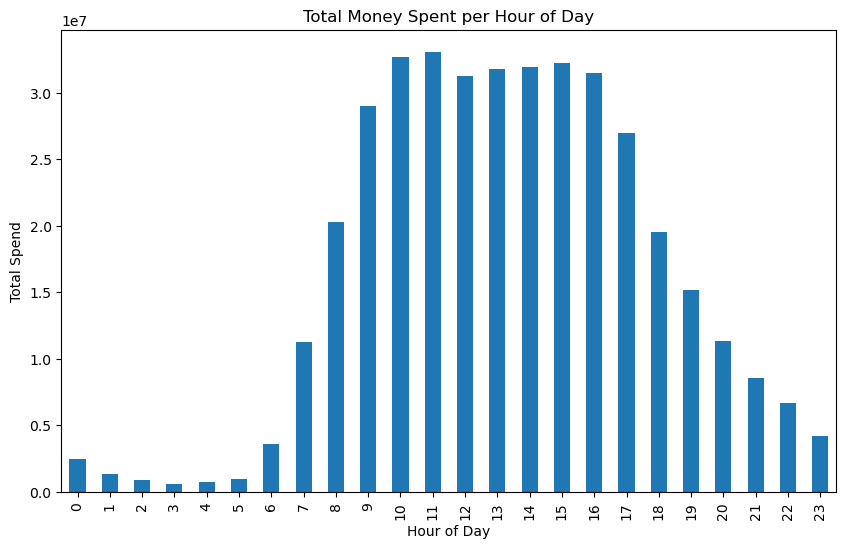

In [90]:
hourly_spend = df_merged_2.groupby('order_hour_of_day')['avg_product_price'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
hourly_spend = hourly_spend.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Total Spend')
plt.title('Total Money Spent per Hour of Day')
plt.xticks(range(0,24))
plt.show()

In [91]:
# Export the Bar Chart

hourly_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_hourly_spend.png'))

In [92]:
# exporting to pickle

df_merged_2.to_pickle(os.path.join(path, 'df_merged_2.pickle'))